In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [79]:
df=pd.read_csv("./loan_approval_dataset.csv")

In [80]:
df.shape

(4269, 13)

In [81]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [82]:
df[' education'].value_counts()

 education
 Graduate        2144
 Not Graduate    2125
Name: count, dtype: int64

In [83]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [84]:
from sklearn.preprocessing import LabelEncoder

In [85]:
le = LabelEncoder()
df[' education'] = le.fit_transform(df[' education'])

In [86]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,1,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,0,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,0,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,1,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [87]:
df[' self_employed'] 

0         No
1        Yes
2         No
3         No
4        Yes
        ... 
4264     Yes
4265     Yes
4266      No
4267      No
4268      No
Name:  self_employed, Length: 4269, dtype: object

In [88]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,1,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,0,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,0,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,1,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [89]:
df[' education'].unique()

array([0, 1])

In [90]:
cat_cols = [' education', ' self_employed']
for col in cat_cols:
    df[col] =  le.fit_transform(df[col])

In [91]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [92]:
dtc = DecisionTreeClassifier(max_depth=4, random_state=50)

x = df.drop(columns=[' loan_status'])   
y = df[' loan_status']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=50
)

dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=50)

In [93]:
pred_y = dtc.predict(x_test)

In [94]:
print("Accuracy score:", accuracy_score(y_test, pred_y))


Accuracy score: 0.9660421545667447


In [95]:
print("Classification Report:\n", classification_report(y_test, pred_y))

Classification Report:
               precision    recall  f1-score   support

    Approved       0.95      1.00      0.97       545
    Rejected       0.99      0.91      0.95       309

    accuracy                           0.97       854
   macro avg       0.97      0.95      0.96       854
weighted avg       0.97      0.97      0.97       854



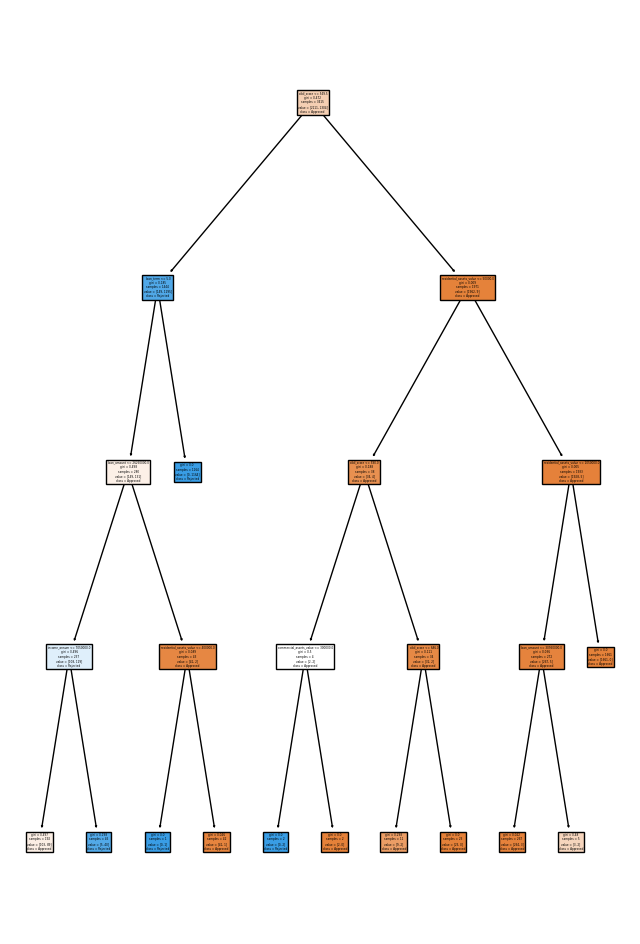

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(8,12))
tree.plot_tree(
    dtc,
    filled=True,
    feature_names=list(x.columns),  
    class_names=['Approved', 'Rejected']
)
plt.show()